<a href="https://colab.research.google.com/github/emm-gl/Vision/blob/main/Vision_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.

2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.

3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.

4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

<class 'numpy.ndarray'>


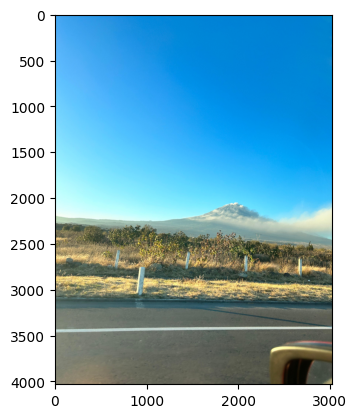

In [ ]:
#Load Image:    Using matplotlib
img1 = mpimg.imread('data/A1.jpeg')
plt.imshow(img1)
print(type(img1))

In [ ]:
img1.shape

(4032, 3024, 3)

numpy.ndarray

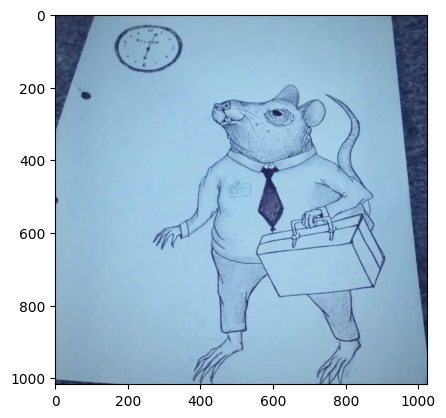

In [ ]:
#Using Open CV: CV2

img2 = cv2.imread('data/A2.jpeg')
plt.imshow(img2)
type(img2)

Open CV gets the image in BGR instead of RGB, just change the format:


AxesImage(size=(1017, 1024))


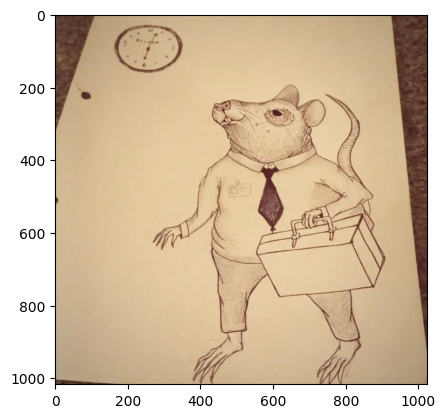

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

In [ ]:
type(img2)

numpy.ndarray

<class 'PIL.JpegImagePlugin.JpegImageFile'>


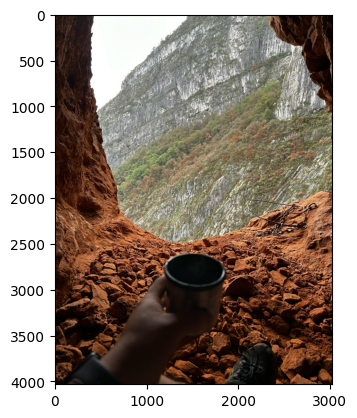

In [ ]:
#Finally using PIL another image library:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/A3.jpeg')
plt.imshow(img3)
print(type(img3))

<class 'numpy.ndarray'>
(4032, 3024, 3)
AxesImage(size=(4032, 3024))


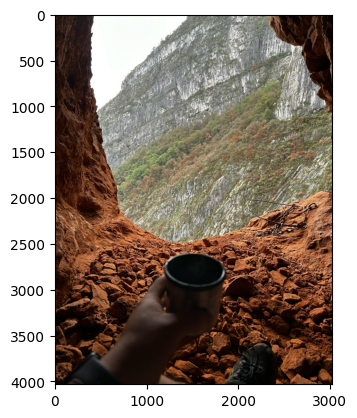

In [ ]:
#Take care, whent PIL gets the image, this is in JPEGImageFile format, if we need to use it as a numpy array
#we should to convert it:

img3 = np.array(img3)
print(type(img3))
print(img3.shape)
print(plt.imshow(img3))


Intensity transformations operate on single pixels of an image for tasks such as contrast manipulation and image thresholding:

Types of function:
1. Linear: Identity and Negative
2. Logarithmic
3. Power-law

**Negative Transform**


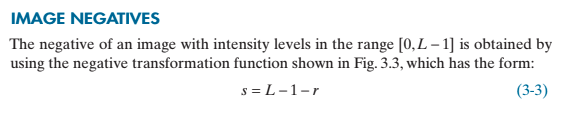

In [ ]:
#Negative function:
#Input image must be a numpy array:

def NegativeImage(InputImage):
  Neg_img = np.max(InputImage) - 1 - InputImage

  return Neg_img

In [ ]:
#Load Images:
img1 = mpimg.imread('data/A1.jpeg')
img2 = mpimg.imread('data/A2.jpeg')
img3 = mpimg.imread('data/A3.jpeg')
img4 = mpimg.imread('data/A4.jpeg')

In [ ]:
#Convert negative images
img1_neg = NegativeImage(img1)
img2_neg = NegativeImage(img2)
img3_neg = NegativeImage(img3)
img4_neg = NegativeImage(img4)

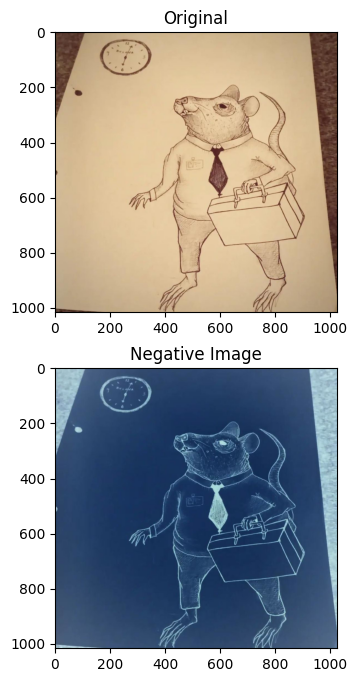

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(img2)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img2_neg)
a.set_title('Negative Image')

plt.show()

**Logarithmic Transforms**



In [ ]:
#Logarithmic function:
#Input image must be a numpy array:

def LogTransform(InputImage):
  #c = 1
  c = 255 / np.log(1 + np.max(InputImage))
  log_image = c * (np.log(1 + InputImage))

  #Convert to int from float
  log_image = np.array(log_image, dtype = np.uint8)

  return log_image

In [ ]:
img1_log = LogTransform(img1)
img2_log = LogTransform(img2)
img3_log = LogTransform(img3)
img4_log = LogTransform(img4)

<ipython-input-55-d506e625eb55>:7: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(1 + InputImage))


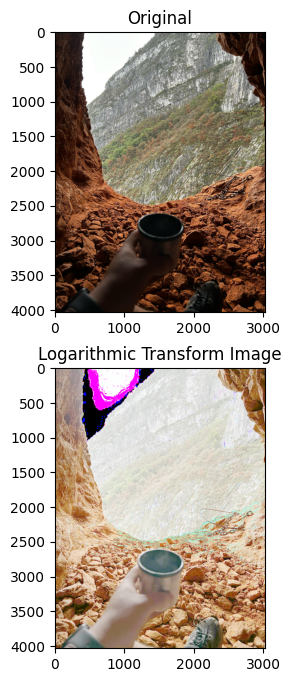

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(img3)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img3_log)
a.set_title('Logarithmic Transform Image')

plt.show()

**Power Law (gamma) Transform **

The general form of Power law (Gamma) transformation function is

s = c*r^γ

Where, ‘s’ and ‘r’ are the output and input pixel values, respectively and ‘c’ and γ are the positive constants

In [ ]:
def GammaTransform(InputImage):
  c = 255
  y = 0.4
  gamma_img = np.array(c * (InputImage/255) ** y, dtype = 'uint8')  #Normalize the image
  return gamma_img

In [ ]:
img1_gamma = GammaTransform(img1)
img2_gamma = GammaTransform(img2)
img3_gamma = GammaTransform(img3)
img4_gamma = GammaTransform(img4)

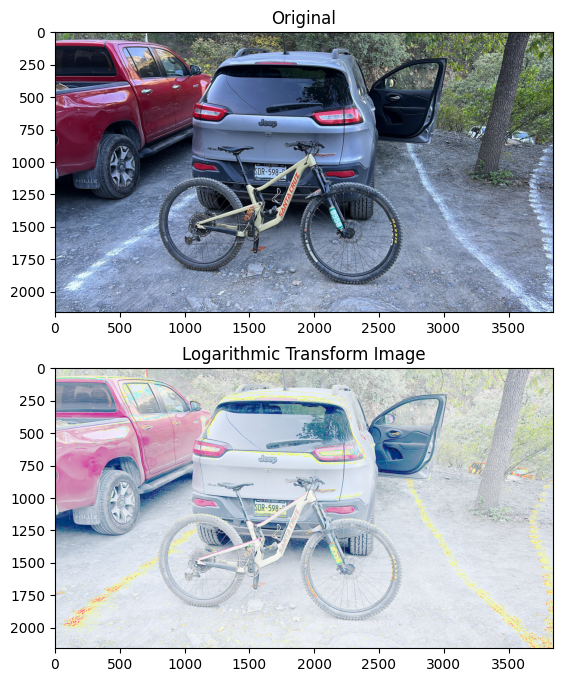

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(img4)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img4_log)
a.set_title('Logarithmic Transform Image')

plt.show()

# 3.2 Algoritmos de mejoramiento de imágenes en el dominio espacial

Para esta actividad se requiere:

Ingresar a Canvas y descargar el proyecto en Notebook Download Notebook.
Revisar los ejercicios propuestos antes de codificar e identificar las secciones de libro o de las slides que te puedan servir como soporte.
El proyecto con el código de los ejercicios extras que se describen en  abajo se debe convertir en PDF y también en archivo comprimido y entregarse vía Canvas.
Los ejercicios que deben agregarse a este proyecto serán los siguientes:



1.   Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

2.   Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes









# Prewitt:

In [2]:
#Convolution function:

def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros

    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
    return J

In [3]:
#Get image from Internet:
from urllib.request import urlopen
from PIL import Image
from io import BytesIO

def get_image_from_url(url):
    try:
        response = urlopen(url)
        image_data = response.read()
        image = Image.open(BytesIO(image_data))
        return image
    except Exception as e:
        print(f"Error: {e}")
        return None


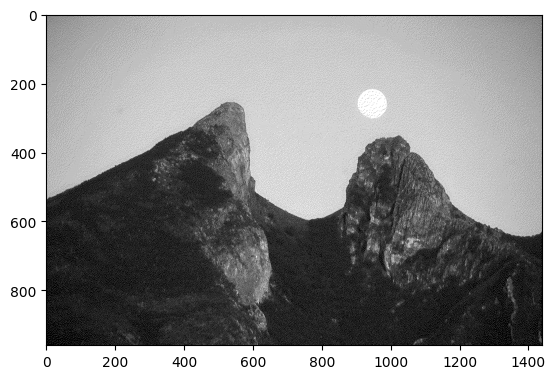

In [4]:
#Get the image:
image_url = "https://tipsparatuviaje.com/wp-content/uploads/2019/02/que-es-el-cerro-de-la-silla.jpg"

image =  get_image_from_url(image_url)   #Image.open('data/image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [9]:
image = image.astype(float)

In [20]:
#Set the filter:

#X direction:
Hx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
Hx

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

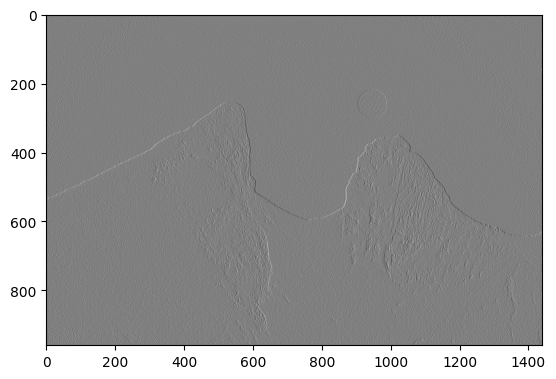

In [22]:
n = 7
#H = block_filter(n)
Jx = apply_filter(image, Hx)

plt.imshow(Jx, cmap='gray')
plt.show()

In [23]:
#Set the filter:

#Y direction:
Hy = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
Hy

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

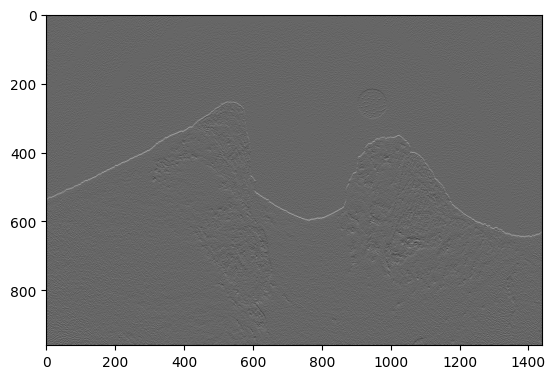

In [24]:
Jy = apply_filter(image, Hy)

C

In [25]:
#Magnitude image:

edge_magnitude = np.sqrt(Jx**2 + Jy**2)

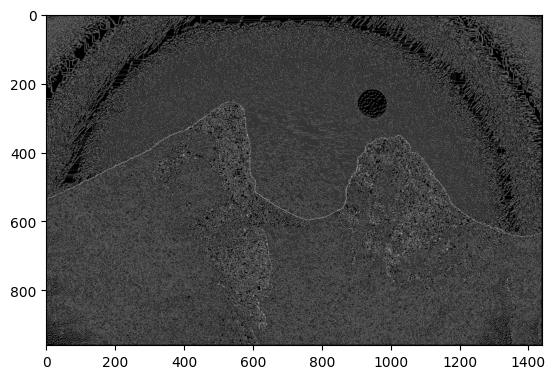

In [26]:
plt.imshow(edge_magnitude, cmap='gray')
plt.show()

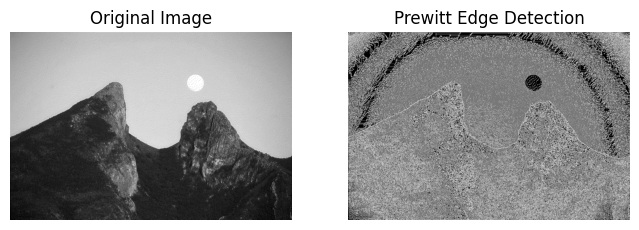

In [27]:
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image

def prewitt_edge_detector(image_path):
    # Load the image
    image =  get_image_from_url(image_url)   #Image.open('data/image.jpg')
    image = image.convert('1') # convert image to black and white
    #image = Image.open(image_path).convert("L")  # Convert to grayscale



    original_array = np.array(image)

    # Apply the Prewitt filter for horizontal and vertical edges
    prewitt_horizontal = ndimage.prewitt(original_array, axis=1)
    prewitt_vertical = ndimage.prewitt(original_array, axis=0)

    # Combine horizontal and vertical edges to get the final edge-detected image
    edge_magnitude = np.sqrt(prewitt_horizontal**2 + prewitt_vertical**2)

    # Display the original image and the edge-detected image
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edge_magnitude, cmap='gray')
    plt.title('Prewitt Edge Detection')
    plt.axis('off')

    plt.show()

# Replace "your_image_path.jpg" with the path to your image file
prewitt_edge_detector("your_image_path.jpg")


# Sobel